In [58]:
import pandas as pd
import numpy as np
import sklearn.datasets as data

### Experiment 6
- Pruning:
  - Pre and Post (setting limits)
  - pre: set max depth
  - post: first make the tree and then cut the depth (bottom-up)

- Over-fitting 
    - (More training accuracy & less testing accuracy)
- Under-fitting 
    - (More testing accuracy & less training accuracy)

- For making Decesion Tree:
   - When entropy=0, info gain is max, select that at root

In [59]:
d1 = data.load_iris()
d1 

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [60]:
iris=pd.DataFrame(data=d1.data, columns=d1.feature_names)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [61]:
iris['target']=d1.target

In [62]:
iris # no need to write

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [63]:
X = d1.data
y = d1.target

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30) #returns 4 arrays

In [65]:
X_train # no need to write

array([[6.9, 3.1, 4.9, 1.5],
       [6.4, 2.9, 4.3, 1.3],
       [6. , 3. , 4.8, 1.8],
       [4.6, 3.6, 1. , 0.2],
       [6.2, 2.2, 4.5, 1.5],
       [5.8, 2.6, 4. , 1.2],
       [7.7, 3.8, 6.7, 2.2],
       [5.4, 3.4, 1.7, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [4.9, 2.5, 4.5, 1.7],
       [5. , 3.5, 1.6, 0.6],
       [6.3, 2.5, 5. , 1.9],
       [5.6, 2.8, 4.9, 2. ],
       [7.2, 3.2, 6. , 1.8],
       [5. , 3.3, 1.4, 0.2],
       [5.3, 3.7, 1.5, 0.2],
       [6.7, 3.3, 5.7, 2.1],
       [4.8, 3.4, 1.6, 0.2],
       [5.7, 2.8, 4.5, 1.3],
       [5.8, 2.7, 5.1, 1.9],
       [6.3, 2.3, 4.4, 1.3],
       [4.4, 2.9, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 3.2, 4.5, 1.5],
       [5.6, 2.9, 3.6, 1.3],
       [5.7, 2.9, 4.2, 1.3],
       [6.8, 3. , 5.5, 2.1],
       [4.4, 3. , 1.3, 0.2],
       [6. , 2.2, 5. , 1.5],
       [5.7, 2.5, 5. , 2. ],
       [7.1, 3. , 5.9, 2.1],
       [6.7, 3. , 5. , 1.7],
       [5.8, 2.7, 3.9, 1.2],
       [6.2, 2

In [66]:
X_test # no need to write

array([[6.5, 3. , 5.8, 2.2],
       [6.4, 2.8, 5.6, 2.2],
       [4.6, 3.4, 1.4, 0.3],
       [5.1, 3.8, 1.6, 0.2],
       [6.5, 3. , 5.5, 1.8],
       [5. , 3.2, 1.2, 0.2],
       [5. , 2.3, 3.3, 1. ],
       [5.6, 3. , 4.1, 1.3],
       [4.7, 3.2, 1.6, 0.2],
       [5.6, 3. , 4.5, 1.5],
       [6.2, 2.9, 4.3, 1.3],
       [5. , 3.5, 1.3, 0.3],
       [6.5, 3.2, 5.1, 2. ],
       [5.7, 2.6, 3.5, 1. ],
       [5.2, 2.7, 3.9, 1.4],
       [6.4, 3.2, 5.3, 2.3],
       [6.4, 2.8, 5.6, 2.1],
       [5.5, 2.4, 3.7, 1. ],
       [5.5, 2.3, 4. , 1.3],
       [6. , 2.9, 4.5, 1.5],
       [5. , 3.4, 1.5, 0.2],
       [6.7, 3.3, 5.7, 2.5],
       [7.9, 3.8, 6.4, 2. ],
       [6.1, 2.8, 4.7, 1.2],
       [6.1, 2.8, 4. , 1.3],
       [4.5, 2.3, 1.3, 0.3],
       [5.4, 3.4, 1.5, 0.4],
       [7.2, 3.6, 6.1, 2.5],
       [5.1, 3.8, 1.5, 0.3],
       [5.1, 2.5, 3. , 1.1],
       [4.9, 2.4, 3.3, 1. ],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 2.5, 4.9, 1.5],
       [4.9, 3.6, 1.4, 0.1],
       [6.7, 3

In [67]:
y_train # no need to write

array([1, 1, 2, 0, 1, 1, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 1, 2, 1, 0,
       0, 0, 1, 1, 1, 2, 0, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 1, 1, 2, 2, 1, 0, 0, 1, 0, 1, 2,
       1, 0, 1, 0, 2, 1, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 2, 0, 0, 0, 1, 2,
       0, 1, 0, 1, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0])

In [68]:
y_test # no need to write

array([2, 2, 0, 0, 2, 0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 1, 1, 0, 2,
       2, 1, 1, 0, 0, 2, 0, 1, 1, 2, 1, 0, 1, 2, 2, 2, 1, 2, 2, 0, 1, 2,
       0])

In [69]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier()

In [70]:
dct # no need to write

DecisionTreeClassifier()

In [71]:
dct.fit(X_train, y_train)

DecisionTreeClassifier()

In [72]:
y_predict=dct.predict(X_test)

In [73]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predict.flatten()})
df

,Actual,Predicted
0,2,2
1,2,2
2,0,0
3,0,0
4,2,2
5,0,0
6,1,1
7,1,1
8,0,0
9,1,1


In [74]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))


0.9777777777777777
[[12  0  0]
 [ 0 16  1]
 [ 0  0 16]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.94      0.97        17
           2       0.94      1.00      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



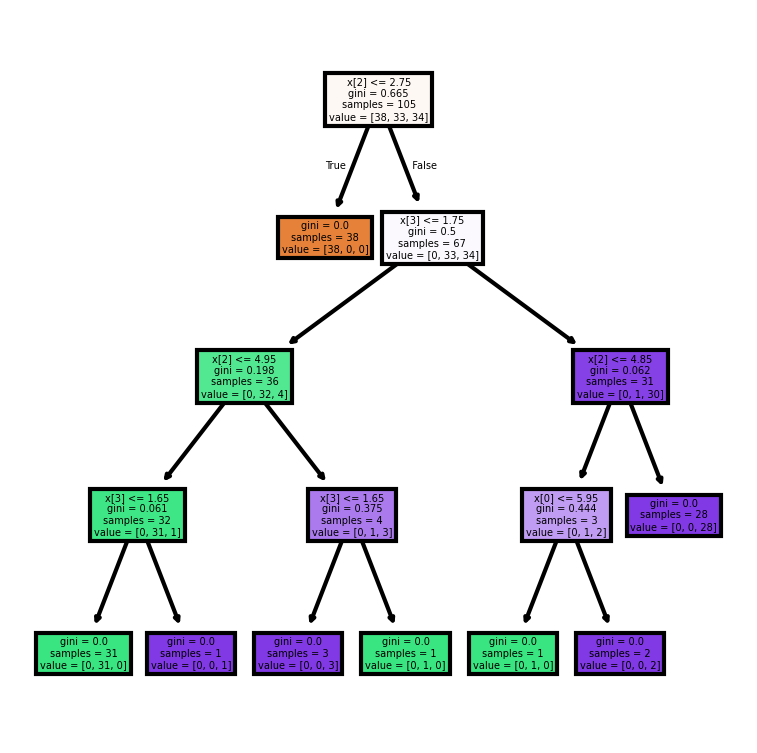

In [75]:
from sklearn import tree

fig, axes = plt.subplots(figsize=(3,3),dpi=300)
tree.plot_tree(dct,filled=True)
fig.savefig('decision Tree.png')

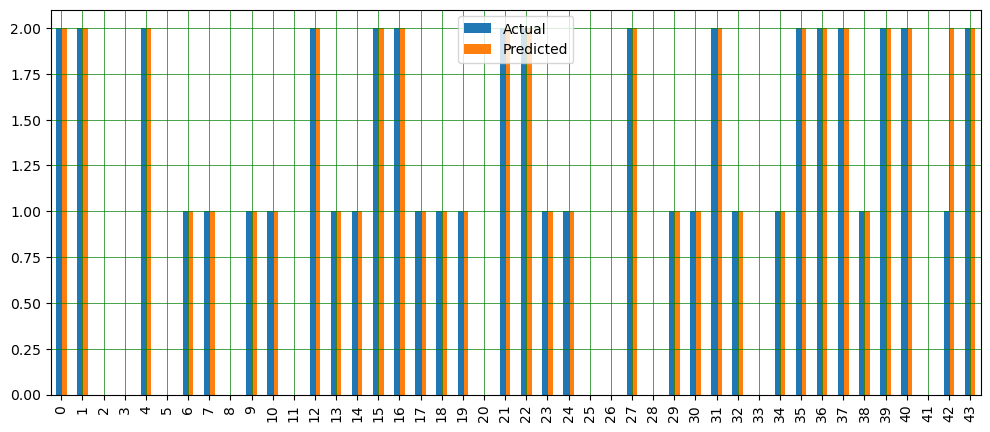

In [76]:
import matplotlib.pyplot as plt

# no need to write
df2 = df.head(44)
df2.plot(kind='bar', figsize=(12,5))
plt.grid(which='major', linestyle='-', linewidth='0.5',color='green')
plt.show()

In [77]:
data2=pd.read_csv("train.csv")

In [78]:
data2 # no need to write

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [79]:
data2.drop(["PassengerId","Name", "SibSp", "Parch", "Ticket","Fare","Cabin","Embarked"], axis="columns", inplace=True)


In [80]:
data2.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [82]:
X = data2.drop(["Survived"], axis="columns")
y = data2["Survived"]

In [88]:
X.head()

,Pclass,Sex,Age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0


In [87]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [86]:
X.Sex = X.Sex.map({"male":0, "female":1})
X.head()

,Pclass,Sex,Age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0


In [89]:
X.Age[0:50]

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5      NaN
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17     NaN
18    31.0
19     NaN
20    35.0
21    34.0
22    15.0
23    28.0
24     8.0
25    38.0
26     NaN
27    19.0
28     NaN
29     NaN
30    40.0
31     NaN
32     NaN
33    66.0
34    28.0
35    42.0
36     NaN
37    21.0
38    18.0
39    14.0
40    40.0
41    27.0
42     NaN
43     3.0
44    19.0
45     NaN
46     NaN
47     NaN
48     NaN
49    18.0
Name: Age, dtype: float64

In [90]:
X.Age = X.Age.fillna(X.Age.mean())
X.Age[0:40]

0     22.000000
1     38.000000
2     26.000000
3     35.000000
4     35.000000
5     29.699118
6     54.000000
7      2.000000
8     27.000000
9     14.000000
10     4.000000
11    58.000000
12    20.000000
13    39.000000
14    14.000000
15    55.000000
16     2.000000
17    29.699118
18    31.000000
19    29.699118
20    35.000000
21    34.000000
22    15.000000
23    28.000000
24     8.000000
25    38.000000
26    29.699118
27    19.000000
28    29.699118
29    29.699118
30    40.000000
31    29.699118
32    29.699118
33    66.000000
34    28.000000
35    42.000000
36    29.699118
37    21.000000
38    18.000000
39    14.000000
Name: Age, dtype: float64

In [92]:
X_train, X_test, y_train, y_test= train_test_split(X,y,train_size=0.8)

In [94]:
X_train.head()

,Pclass,Sex,Age
538,3,0,29.699118
878,3,0,29.699118
669,1,1,29.699118
710,1,1,24.000000
723,2,0,50.000000


In [95]:
X_test.head()

,Pclass,Sex,Age
344,2,0,36.000000
446,2,1,13.000000
715,3,0,19.000000
121,3,0,29.699118
562,2,0,28.000000


In [96]:
y_train.head()

538    0
878    0
669    1
710    1
723    0
Name: Survived, dtype: int64

In [97]:
y_test.head()

344    0
446    1
715    0
121    0
562    0
Name: Survived, dtype: int64

In [98]:
len(X_test)

179

In [99]:
len(X_train)

712

In [100]:
model_dt = tree.DecisionTreeClassifier(max_depth=3)
model_dt

DecisionTreeClassifier(max_depth=3)

In [102]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [104]:
y_predict=model_dt.predict(X_test)

In [110]:
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df3.head()

,Actual,Predicted
344,0,0
446,1,1
715,0,0
121,0,0
562,0,0


In [108]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

0.7597765363128491
[[93 17]
 [26 43]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       110
           1       0.72      0.62      0.67        69

    accuracy                           0.76       179
   macro avg       0.75      0.73      0.74       179
weighted avg       0.76      0.76      0.76       179



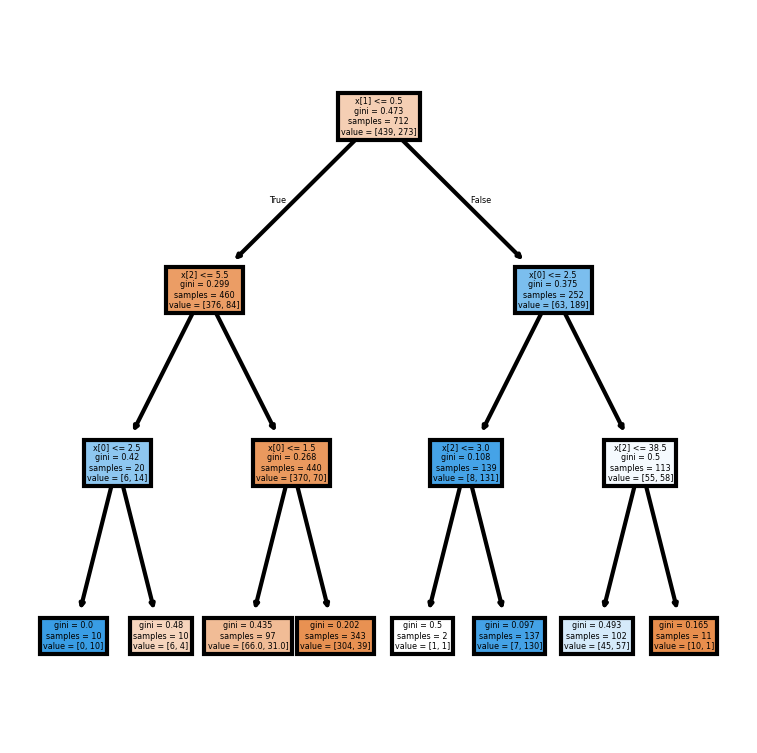

In [109]:
from sklearn import tree

fig, axes = plt.subplots(figsize=(3,3),dpi=300)
tree.plot_tree(model_dt,filled=True)
fig.savefig('Titanic.png')

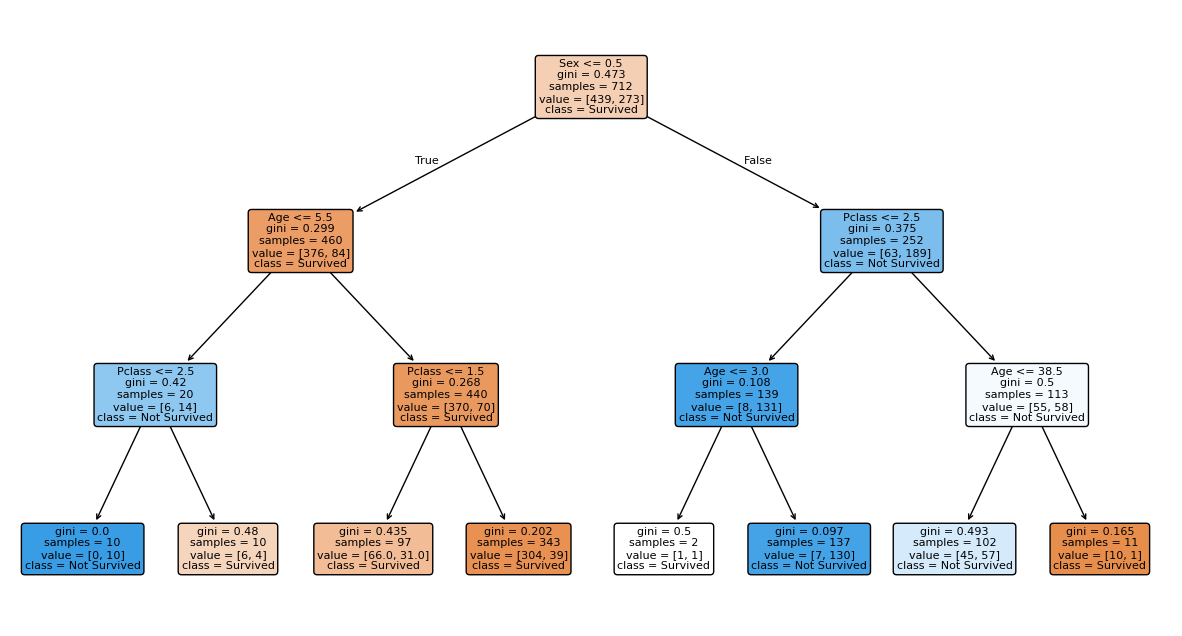

In [121]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,8))
graph_tree = plot_tree(model_dt, feature_names=['Pclass', 'Sex','Age'], class_names=['Survived','Not Survived'], filled=True,rounded=True,fontsize=8)
fig.savefig('Titanic_other.png')

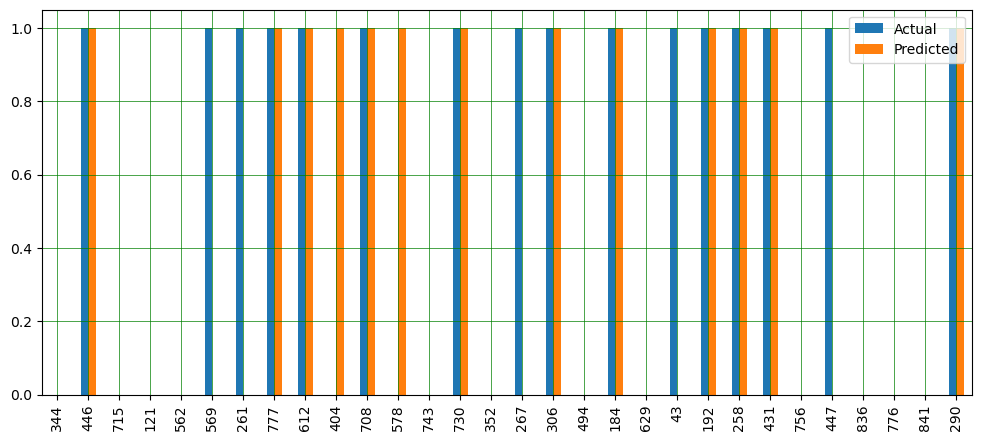

In [112]:
import matplotlib.pyplot as plt

# no need to write
dff = df3.head(30)
dff.plot(kind='bar', figsize=(12,5))
plt.grid(which='major', linestyle='-', linewidth='0.5',color='green')
plt.show()